Imports


In [ ]:
import os
import zipfile
import shutil
import urllib.request

import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from google.colab import drive
from google.colab.patches import cv2_imshow

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Face detection : Haar Cascade

In [ ]:
# URL of the haarcascade_frontalface_default.xml file on GitHub
url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

# Download file
urllib.request.urlretrieve(url, "haarcascade_frontalface_default.xml")


('haarcascade_frontalface_default.xml',
 <http.client.HTTPMessage at 0x7c701d904d60>)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


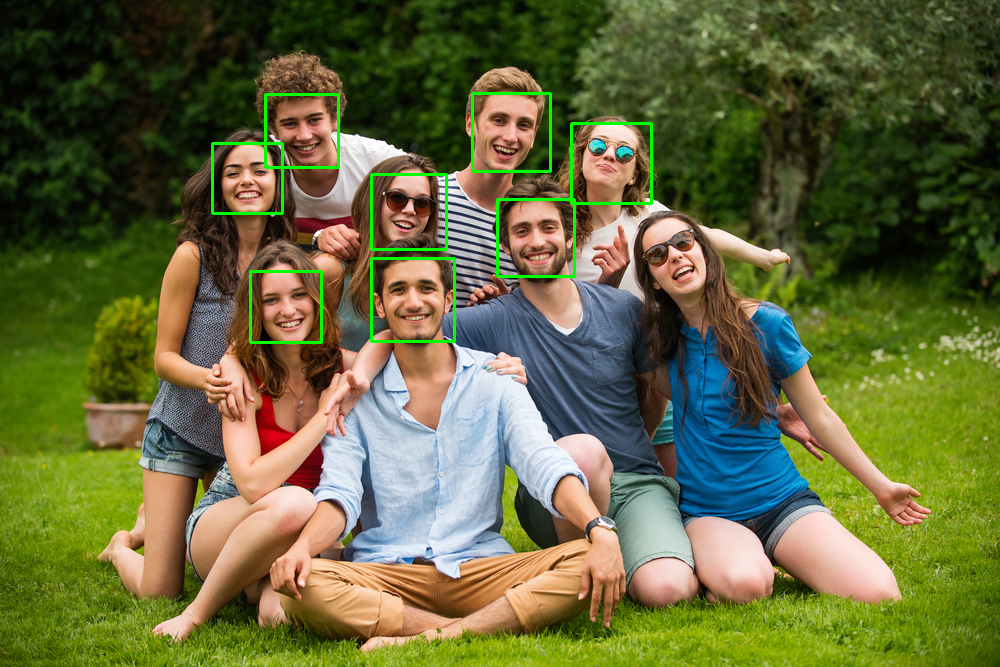

In [ ]:
# Load the Haar Cascade XML file for face detection
cascade_path = '/content/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

# Load the image on which you wish to perform detection
image_path = '/content/drive/MyDrive/Colab/lab/group.jpg'
detection_path = '/content/group_detect.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Face detection
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

# Draw boxes
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Plot
cv2_imshow(image)

detection_path
cv2.imwrite(detection_path, image)

cv2.waitKey(0)
cv2.destroyAllWindows()


Delete file


In [ ]:
#cmd

#####for /r %i in (*FL.JPG *FR.JPG) do del "%i"




Resize (used locally with VSCODE)

In [ ]:
def resize_images(input_directory, output_directory, width, height):

    os.makedirs(output_directory, exist_ok=True)

    for root, dirs, files in os.walk(input_directory):
        for file in files:
            if file.endswith('.JPG') or file.endswith('.jpg'):
                input_path = os.path.join(root, file)
                output_path = os.path.join(output_directory, file)

                print(input_path)
                image = cv2.imread(input_path)

                resized_image = cv2.resize(image, (width, height))

                cv2.imwrite(output_path, resized_image)

current_directory = os.getcwd()
input_directory = current_directory
output_directory = current_directory + 'KDEF_resize'
target_width = 224
target_height = 224

resize_images(input_directory, output_directory, target_width, target_height)


In [ ]:
# Path to the uploaded zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Colab/lab/KDEF_resize.zip'

# Target folder to unzip into
target_folder = '/content/'

os.makedirs(target_folder, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)


In [ ]:
raw_data_path = "/content/KDEF_resize"
print(len([name for name in os.listdir(raw_data_path) ]))

2935


In [ ]:
example = os.path.join(raw_data_path, os.listdir(raw_data_path)[0])
print(example)
im = cv2.imread(example)
print(im.shape)


/content/KDEF_resize/AM07SUHL.JPG
(224, 224, 3)


Letter 5 & 6: Expression

AF = afraid

AN = angry

DI = disgusted

HA = happy

NE = neutral

SA = sad

SU = surprised

In [ ]:
def correspondance_table(entree):
    correspondances = {
        'AF': 'afraid',
        'AN': 'angry',
        'DI': 'disgusted',
        'HA': 'happy',
        'NE': 'neutral',
        'SA': 'sad',
        'SU': 'surprised',
    }

    if len(entree) < 2:
        return 'Entrée invalide'

    lettres = entree[:2].upper()
    mot_correspondant = correspondances.get(lettres, 'Inconnu')

    return mot_correspondant

/content/KDEF_resize/BF07SUS.JPG
Emotion : surprised


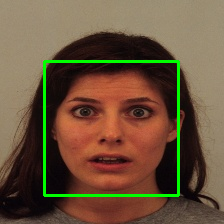

In [ ]:
# Haar Cascade file
cascade_path = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

# Load image
image_name = os.listdir(raw_data_path)[28]
image_path = os.path.join(raw_data_path, image_name)
print(image_path)
resultat = correspondance_table(image_name[4:6])
print("Emotion :", resultat)

image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

# Draw box
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Plot
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Crop face images

In [ ]:
cascade_path = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

# Raw img folder
dossier_images = raw_data_path

# Crop folder
dossier_crop = 'face_detection_crop'

# Img with box folder
dossier_img_bb = 'image_with_box'

dossiers = [dossier_crop, dossier_img_bb]
for dossier in dossiers:
  if not os.path.exists(dossier):
    os.makedirs(dossier)

for fichier_image in os.listdir(dossier_images):
    if fichier_image.endswith(('.JPG', '.jpg', '.jpeg', '.png')):  # For every img

        chemin_image = os.path.join(dossier_images, fichier_image)
        image = cv2.imread(chemin_image)
        image_crop = image.copy()

        # Grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Crop list
        faces_crops = []

        # For each face
        for (x, y, w, h) in faces:

            # Take crop
            face_crop = image_crop[y:y+h, x:x+w]
            faces_crops.append(face_crop)

            # Draw box on raw img
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Save crops and img with boxes seperatly
        for i, face_crop in enumerate(faces_crops):
            nom_fichier_crop = f'{os.path.splitext(fichier_image)[0]}_crop{i+1}.jpg'
            chemin_fichier_crop = os.path.join(dossier_crop, nom_fichier_crop)
            image_redimensionnee = cv2.resize(face_crop, (128, 128))
            cv2.imwrite(chemin_fichier_crop, image_redimensionnee)

        chemin_image_modifiée = os.path.join(dossier_img_bb, fichier_image)
        cv2.imwrite(chemin_image_modifiée, image)

print("Image processing is complete.")

Zip and save *face_detection_crop* folder on Google Drive to skip the cropping step next time

In [ ]:
folder_name = 'face_detection_crop'

folder_path = f'/content/{folder_name}'

shutil.make_archive(folder_name, 'zip', folder_path)

drive_path = '/content/drive/MyDrive/Colab/lab'

# Move the zip file to Google Drive
shutil.move(folder_path + '.zip', drive_path)

'/content/face_detection_crop.zip'

# Load cropped images folder : raw dataset

Start from here next time !

In [ ]:
# Path to the uploaded zip file (cropped images) in Google Drive
zip_file_path = '/content/drive/MyDrive/Colab/lab/face_detection_crop.zip'

# Target folder
target_folder = '/content/face_detection_crop'
os.makedirs(target_folder, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [ ]:
print(len([name for name in os.listdir('face_detection_crop') ]))

2876


In [ ]:
def compter_elements_differents(liste):
    elements_uniques = set(liste)
    nombre_elements_differents = len(elements_uniques)
    print(elements_uniques)
    return nombre_elements_differents

In [ ]:
def supprimer_fichier(dataset_path, filename):
    chemin_fichier = os.path.join(dataset_path, filename)

    try:
        if os.path.exists(chemin_fichier):
            os.remove(chemin_fichier)
            print(f"Le fichier {chemin_fichier} a été supprimé avec succès.")
        else:
            print(f"Le fichier {chemin_fichier} n'existe pas.")
    except FileNotFoundError:
        print(f"Le fichier {chemin_fichier} n'a pas été trouvé.")
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")

# Create split train, val, test

In [ ]:
emotions_a_supprimer = ['H.', 'V.', 'H_', 'V_']

dataset_path = 'face_detection_crop'

image_paths = []
labels = []

for filename in os.listdir(dataset_path):
    if filename.endswith('.JPG') or filename.endswith('.jpg'):
        # Emotion label is on the image name
        # AF01AFHL.JPG --> Afraid
        emotion = filename[4:6]

        if emotion in emotions_a_supprimer:
          print(filename)
          supprimer_fichier(dataset_path, filename)

        else :

          image_path = os.path.join(dataset_path, filename)
          image_paths.append(image_path)
          labels.append(emotion)

print('labels: ', labels)
resultat = compter_elements_differents(labels)

print("Number of different emotions :", resultat)

# Encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


# Load images and encoded labels
images = [cv2.imread(img_path) for img_path in image_paths]
images = np.array(images)
labels = np.array(encoded_labels)
print('encoded_labels:  ', labels)

# Divide data into training, validation and test sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


In [ ]:
# Check dataset dimensions
print("Train images shape:", train_images.shape, "Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape, "Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape, "Test labels shape:", test_labels.shape)


# Training simple classifier

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [ ]:
img_width, img_height, img_channels = 128, 128, 3
num_classes = 7

# CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 7 classes pour 7 émotions
])

# Compile the model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Epoch 1/100
65/65 [==============================] - 2s 17ms/step - loss: 50.1626 - accuracy: 0.1981 - val_loss: 1.5226 - val_accuracy: 0.4549
Epoch 2/100
65/65 [==============================] - 1s 14ms/step - loss: 1.3745 - accuracy: 0.4976 - val_loss: 1.1425 - val_accuracy: 0.5885
Epoch 3/100
65/65 [==============================] - 1s 14ms/step - loss: 1.0512 - accuracy: 0.6140 - val_loss: 1.0286 - val_accuracy: 0.5990
Epoch 4/100
65/65 [==============================] - 1s 10ms/step - loss: 0.8139 - accuracy: 0.7048 - val_loss: 1.0866 - val_accuracy: 0.5972
Epoch 5/100
65/65 [==============================] - 1s 10ms/step - loss: 0.5965 - accuracy: 0.7715 - val_loss: 1.0509 - val_accuracy: 0.6337
Epoch 6/100
65/65 [==============================] - 1s 13ms/step - loss: 0.4475 - accuracy: 0.8415 - val_loss: 1.0152 - val_accuracy: 0.6667
Epoch 7/100
65/65 [==============================] - 1s 13ms/step - loss: 0.3424 - accuracy: 0.8787 - val_loss: 0.9897 - val_accuracy: 0.6684
Epoch

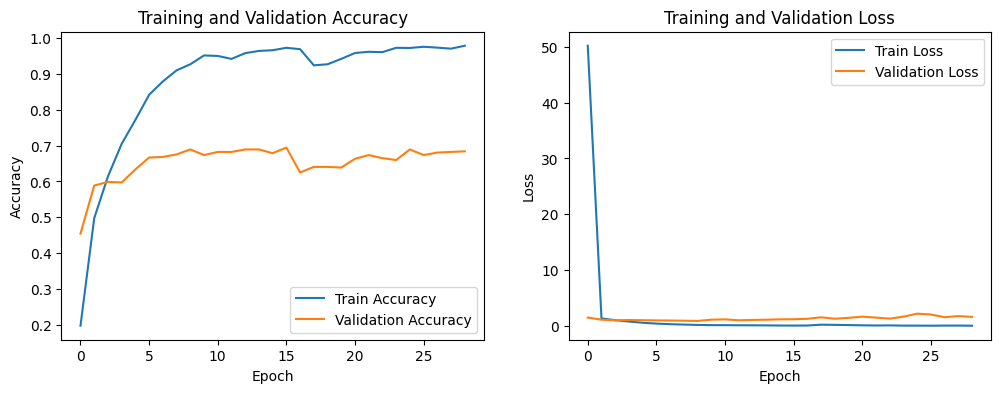

In [ ]:
# Parameters
EPOCHS = 100
BATCH_SIZE = 32

# Add callbacks to save the best model and stop early if necessary
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True),
    TensorBoard(log_dir='./logs', histogram_freq=1)
]

start_time = time.time()

# Model training
history = model.fit(
    train_images, train_labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(val_images, val_labels),
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()

# Evaluate model on testset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


# Calculate the total training time
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60.0
minutes = int(training_time_minutes)
seconds = int(training_time_seconds % 60)

# Print training time
print(f"\nTotal Training Time: {minutes} min {seconds} sec")

# Visualize the evolution of precision and loss during training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# Fine tuning of a pre-trained model : VGG16


In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

img_width, img_height, img_channels = 128, 128, 3
num_classes = 7

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels, num_classes=num_classes)
val_labels_one_hot = to_categorical(val_labels, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes=num_classes)

Epoch 1/200
65/65 [==============================] - 3s 32ms/step - loss: 5.1359 - accuracy: 0.4014 - val_loss: 1.2059 - val_accuracy: 0.5347
Epoch 2/200
65/65 [==============================] - 2s 27ms/step - loss: 0.8356 - accuracy: 0.6918 - val_loss: 0.9976 - val_accuracy: 0.6389
Epoch 3/200
65/65 [==============================] - 2s 23ms/step - loss: 0.4856 - accuracy: 0.8256 - val_loss: 1.0276 - val_accuracy: 0.6684
Epoch 4/200
65/65 [==============================] - 1s 23ms/step - loss: 0.3051 - accuracy: 0.8976 - val_loss: 1.0071 - val_accuracy: 0.6580
Epoch 5/200
65/65 [==============================] - 2s 27ms/step - loss: 0.1540 - accuracy: 0.9507 - val_loss: 0.9088 - val_accuracy: 0.7396
Epoch 6/200
65/65 [==============================] - 1s 23ms/step - loss: 0.0864 - accuracy: 0.9787 - val_loss: 0.9318 - val_accuracy: 0.7309
Epoch 7/200
65/65 [==============================] - 1s 23ms/step - loss: 0.0527 - accuracy: 0.9899 - val_loss: 0.9106 - val_accuracy: 0.7500
Epoch 

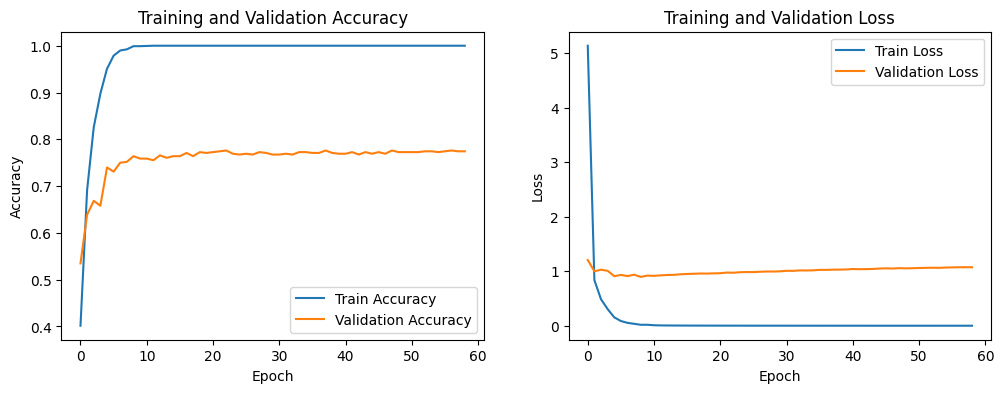

In [ ]:
# Parameters
EPOCHS = 200
BATCH_SIZE = 32

# Load pre-trained VGG16 model without fully connected layers (output layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a new template by adding custom layers on top of the base template
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Freeze layer weights in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks and early stopping
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=50, mode='min', restore_best_weights=True),
    TensorBoard(log_dir='./logs', histogram_freq=1)
]


start_time = time.time()

# Model training
history = model.fit(
    train_images, train_labels_one_hot,  # One hot
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(val_images, val_labels_one_hot), # One hot
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot) # One hot
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


# Training time
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60.0
minutes = int(training_time_minutes)
seconds = int(training_time_seconds % 60)
print(f"\nTotal Training Time: {minutes} min {seconds} sec")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# Data augmentation

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install --upgrade keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

IMG_SIZE = 128
BATCH_SIZE = 32

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(10),
  layers.RandomZoom(0.2),
  layers.RandomWidth(0.2),
  layers.RandomHeight(0.2),
])

preprocessing = tf.keras.Sequential([
    data_augmentation,
    resize_and_rescale
])

Example

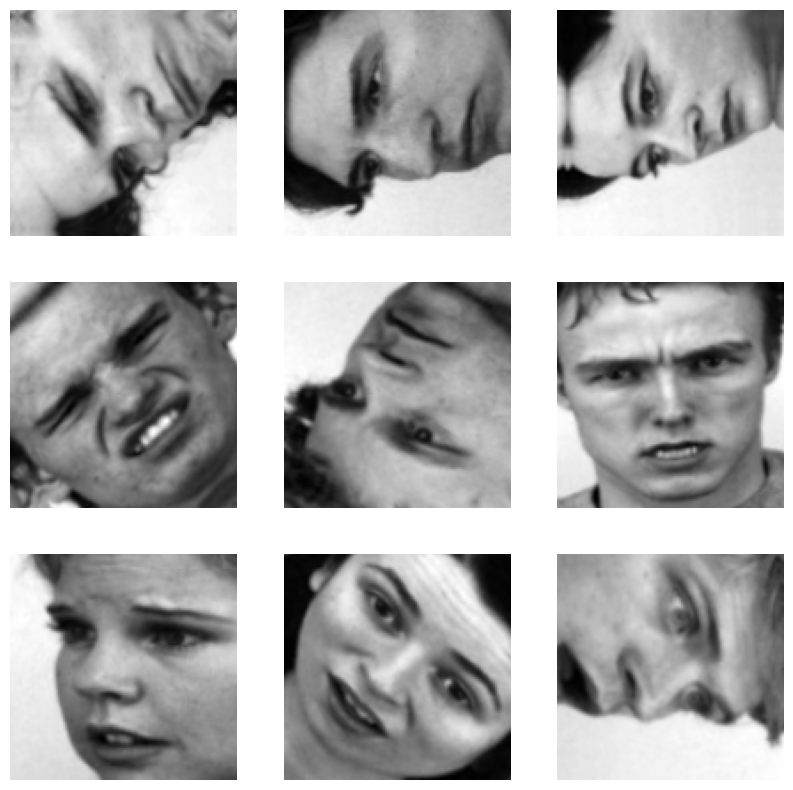

In [ ]:
# train_images contains images as a NumPy ndarray
# Create a TensorFlow dataset from train_images
dataset = tf.data.Dataset.from_tensor_slices(train_images)
shuffled_dataset = dataset.shuffle(buffer_size=len(dataset), reshuffle_each_iteration=False)

# Apply data augmentation and display augmented images
plt.figure(figsize=(10, 10))
for i, image in enumerate(dataset.take(9)):
    image = tf.expand_dims(image, 0)
    gray_img_array = tf.image.rgb_to_grayscale(image)
    augmented_image = preprocessing(gray_img_array)

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0], cmap='gray')
    plt.axis("off")

plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Source img folder
original_images_dir = "/content/face_detection_crop"

# Tranformed img folder
transformed_images_dir = "/content/image_preprocessed"

os.makedirs(transformed_images_dir, exist_ok=True)

# Get img names
image_files = os.listdir(original_images_dir)

# Create an image generator with the specified transformations
data_generator = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Browse each source img and apply transformations
for image_file in image_files:

    img = tf.keras.preprocessing.image.load_img(os.path.join(original_images_dir, image_file))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Generator
    image_generator = data_generator.flow(img_array, batch_size=1)

    # Apply
    for i in range(1):  # transformations (adjust to your requirements)
        transformed_image_array = image_generator.next()[0]
        transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_image_array)
        transformed_image.save(os.path.join(transformed_images_dir, f"transformed_{i}_{image_file}"))


In [ ]:
print(os.listdir('face_detection_crop')[0])
print(os.listdir('image_preprocessed')[0])

BM32HAHR_crop1.jpg
transformed_0_AM20SAHR_crop1.jpg


In [ ]:
print(len(os.listdir('face_detection_crop')))
print(len(os.listdir('image_preprocessed')))

2876
2876


In [ ]:
# Encode labels
def encodeur(entree):
    correspondances = {
        'AF': 0,
        'AN': 1,
        'DI': 2,
        'HA': 3,
        'NE': 4,
        'SA': 5,
        'SU': 6,
    }

    if len(entree) < 2:
        return 'Entrée invalide'
    lettres = entree[:2].upper()
    code = correspondances[lettres]
    return code

encodeur('DI')

2

Create split

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split

# Source img folder and prepocessed img folder
original_images_dir = "/content/face_detection_crop"
transformed_images_dir = "/content/image_preprocessed"

# Load image file names from both folders
original_image_files = os.listdir(original_images_dir)
transformed_image_files = os.listdir(transformed_images_dir)

# Sort
original_image_files.sort()
transformed_image_files.sort()
assert len(original_image_files) == len(transformed_image_files), "Number of images does not match."

data = []
labels = []

# Associate each transformed image with its source image
for original_file, transformed_file in zip(original_image_files, transformed_image_files):
    original_path = os.path.join(original_images_dir, original_file)
    transformed_path = os.path.join(transformed_images_dir, transformed_file)
    data.append((original_path, transformed_path))

    if original_file.endswith('.JPG') or original_file.endswith('.jpg'):

        emotion = encodeur(original_file[4:6])
        labels.append(emotion)

random_seed = 42

# Split
train_data2, val_data2, train_labels2, val_labels2  = train_test_split(data, labels, test_size=0.2, random_state=random_seed)
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(train_data2, train_labels2, test_size=0.1, random_state=random_seed)

print("Number of images in training set :", len(train_data2))
print('nb labels train:', len(train_labels2))
print("Number of images in validation set :", len(val_data2))
print('nb labels val:', len(val_labels2))
print("Number of images in test set :", len(test_data2))
print('nb labels test:', len(test_labels2))


In [ ]:
import numpy as np

# Unpack train :
train_paths = []
train_labels_u = []

for i, item in enumerate(train_data2):

  train_paths.append(item[0])
  train_paths.append(item[1])
  train_labels_u.append(train_labels2[i])
  train_labels_u.append(train_labels2[i])

# Unpack val :
val_paths = []
val_labels_u = []
for i, item in enumerate(val_data2):


  val_paths.append(item[0])
  val_labels_u.append(val_labels2[i])

# Unpack test :
test_paths = []
test_labels_u = []
for i, item in enumerate(test_data2):

  test_paths.append(item[0])

  test_labels_u.append(test_labels2[i])

print(len(train_paths))
print(len(val_paths))
print(len(test_paths))

train_paths_np = np.array([cv2.imread(img_path) for img_path in train_paths])
val_paths_np = np.array([cv2.imread(img_path) for img_path in val_paths])
test_paths_np = np.array([cv2.imread(img_path) for img_path in test_paths])

train_labels_np = np.array(train_labels_u)
val_labels_np = np.array(val_labels_u)
test_labels_np = np.array(test_labels_u)

4140
576
230
4140
576
230


In [ ]:
train_paths_np.shape

(4140, 128, 128, 3)

In [ ]:
print(train_paths[0])
print(train_paths[1])
print(train_labels_u[0])
print(train_labels_u[1])

/content/face_detection_crop/BM14NEHL_crop1.jpg
/content/image_preprocessed/transformed_0_BM14NEHL_crop1.jpg
4
4


In [ ]:
img_width, img_height, img_channels = 128, 128, 3
num_classes = 7
BATCH_SIZE = 32

# One hot encoding
train_labels_one_hot2 = to_categorical(train_labels_np, num_classes=num_classes)
val_labels_one_hot2 = to_categorical(val_labels_np, num_classes=num_classes)
test_labels_one_hot2 = to_categorical(test_labels_np, num_classes=num_classes)

Epoch 1/200
130/130 [==============================] - 4s 20ms/step - loss: 3.6913 - accuracy: 0.3348 - val_loss: 1.3380 - val_accuracy: 0.4653
Epoch 2/200
130/130 [==============================] - 2s 18ms/step - loss: 1.1276 - accuracy: 0.5940 - val_loss: 1.1250 - val_accuracy: 0.5903
Epoch 3/200
130/130 [==============================] - 2s 18ms/step - loss: 0.7408 - accuracy: 0.7367 - val_loss: 1.0702 - val_accuracy: 0.6406
Epoch 4/200
130/130 [==============================] - 2s 18ms/step - loss: 0.4659 - accuracy: 0.8324 - val_loss: 1.0597 - val_accuracy: 0.6736
Epoch 5/200
130/130 [==============================] - 2s 18ms/step - loss: 0.3083 - accuracy: 0.8920 - val_loss: 0.9609 - val_accuracy: 0.6927
Epoch 6/200
130/130 [==============================] - 2s 16ms/step - loss: 0.2053 - accuracy: 0.9285 - val_loss: 1.0211 - val_accuracy: 0.7257
Epoch 7/200
130/130 [==============================] - 2s 16ms/step - loss: 0.1771 - accuracy: 0.9382 - val_loss: 1.0931 - val_accuracy:

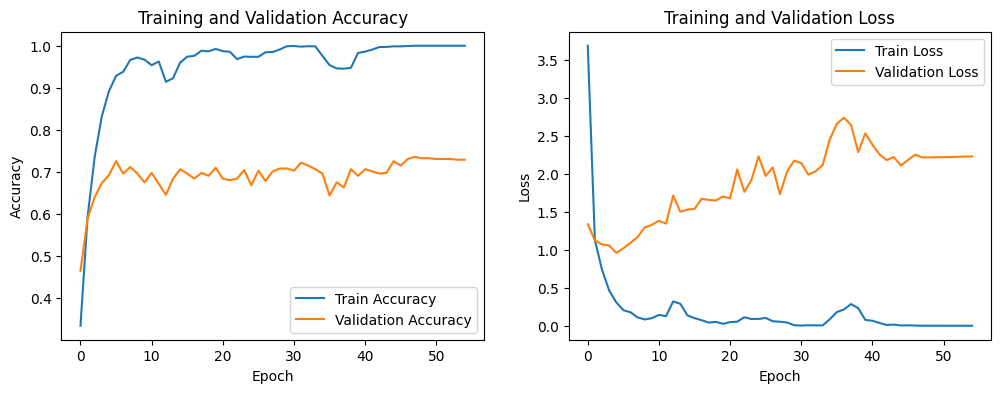

In [ ]:
# VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Compile
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


# Callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=50, mode='min', restore_best_weights=True),
    TensorBoard(log_dir='./logs', histogram_freq=1)
]

start_time = time.time()

# Training
history = model.fit(
    train_paths_np, train_labels_one_hot2,  # One hot
    epochs=200,
    batch_size=32,
    validation_data=(val_paths_np, val_labels_one_hot2), # One hot
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()

# Evaluate
test_loss, test_acc = model.evaluate(test_paths_np, test_labels_one_hot2) # One hot
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


# Training time
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60.0
minutes = int(training_time_minutes)
seconds = int(training_time_seconds % 60)
print(f"\nTotal Training Time: {minutes} min {seconds} sec")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# Run live detection and classification

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model
model = load_model('best.h5')
# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Input img size
img_size = (128, 128)

while True:

    # Releasing and resetting the webcam
    cap.release()
    cap = cv2.VideoCapture(0)

    # Capture webcam video
    ret, frame = cap.read()

    # Grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Face detection with Haar Cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:

        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, img_size)

        # Add a dimension to match model's inputs
        face = np.expand_dims(face, axis=0)

        # Prediction
        predictions = model.predict(face)

        # Interpret the results (according to your model and classes)
        predicted_class = np.argmax(predictions, axis=1)
        score = np.max(predictions)  # Probability associated with the predicted class

        # Display rectangle around face with prediction and accuracy
        label = f"Emotion : {predicted_class[0]} - Accuracy : {score:.2f}"
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display live video
    cv2.imshow('Webcam', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release webcam and close window
cap.release()
cv2.destroyAllWindows()
